<img src="https://images.immediate.co.uk/production/volatile/sites/25/2021/03/aurora-titanic-sinking-4cbae38.jpg?quality=90&resize=768,574" ></img>

# Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the dataset

In [3]:
# load train data
train_set = pd.read_csv("./titanic/train.csv").set_index('PassengerId')
# load test data
test_set = pd.read_csv("./titanic/test.csv").set_index('PassengerId')
# load y_test data
y_test = pd.read_csv("./titanic/gender_submission.csv").set_index('PassengerId')
#show the first rows of the training dataset
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#show informations about the dataset
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
#show the feautures of the dataset
train_set.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

>pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...

>Sibling = brother, sister, stepbrother, stepsister

>Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
#describe the numerical features of the dataset
train_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233C2FC8DF0>,
      dtype=object)

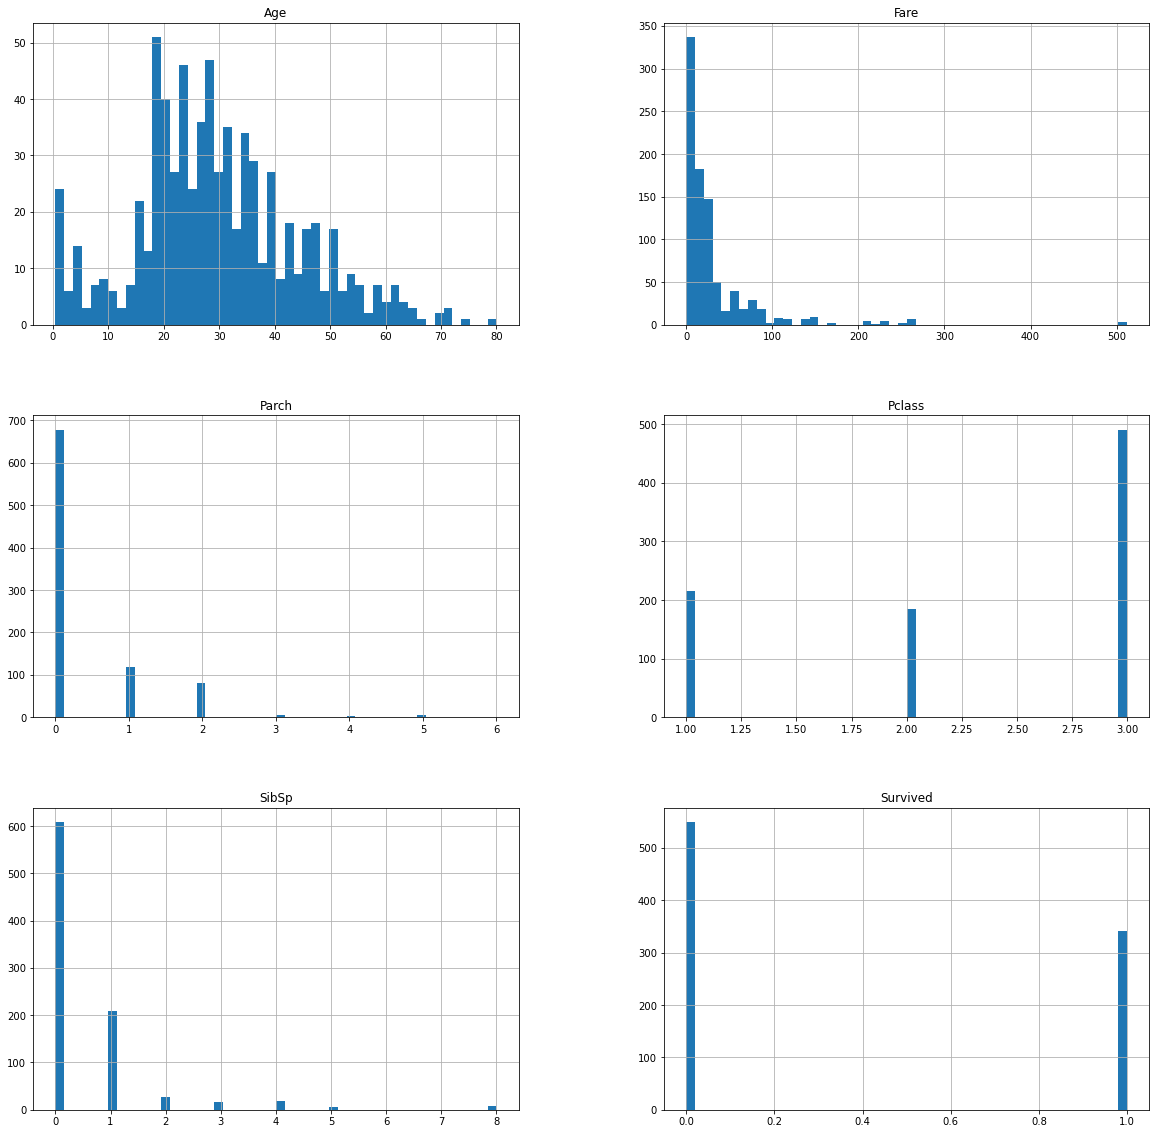

In [6]:
# Histogram
train_set.hist(bins=50,figsize=(20,20))

In [7]:
# Correlation
cor = train_set.corr()
print (cor["Survived"].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


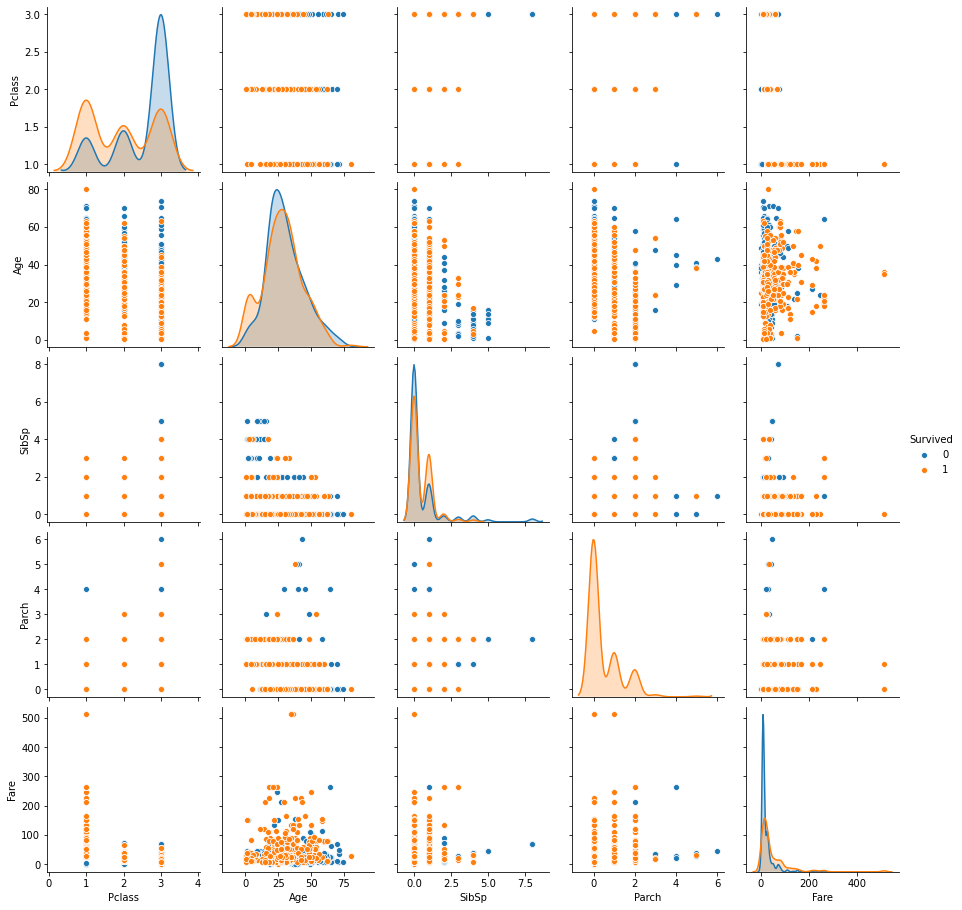

In [8]:
#Pairplot
sns.pairplot(train_set, kind='scatter', hue='Survived')

> the feautures are not highly correlated to the "Survived"

## Survived

> Survived indicates if the person survived (1) or not (0)

In [9]:
# Slice the Survived column
Survived = train_set[["Survived"]]
# count null values
print("null values in " + str(Survived.isnull().sum()))
Survived.head()

null values in Survived    0
dtype: int64


,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


0    549
1    342
Name: Survived, dtype: int64

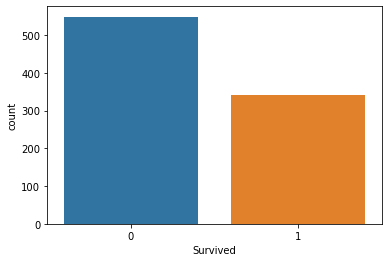

In [10]:
# countplot
sns.countplot(Survived["Survived"])
# Count survived people
Survived["Survived"].value_counts()

> Few are the people that could survive in the Sinking of the Titanic

## Pclass

>pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

In [11]:
# Slice the Pclass column
Pclass = train_set[["Pclass"]]
# count null values
print("null values in " + str(Pclass.isnull().sum()))
Pclass.head()

null values in Pclass    0
dtype: int64


,Pclass
PassengerId,
1,3
2,1
3,3
4,1
5,3


3    491
1    216
2    184
Name: Pclass, dtype: int64

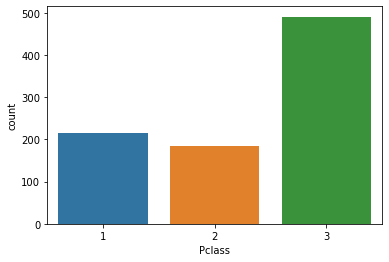

In [12]:
# countplot
sns.countplot(Pclass["Pclass"])
# Count Pclass
Pclass["Pclass"].value_counts()

> Most of people belonged to the lower class

## Name

> The name refers to each person on the boat

In [13]:
import re
def Lname(x):
    pattern = r"([a-zA-Z]*), ([a-zA-Z]*). ([a-zA-Z ]*)"
    results = re.match(pattern,str(x))
    if results is not None:
        return results[1]
    else:
        return "-"
def title(x):
    pattern = r"([a-zA-Z]*), ([a-zA-Z ]*). ([a-zA-Z ]*)"
    results = re.match(pattern,str(x))
    if results is not None:
        return results[2]
    else:
        return "-"
# extract Last name
train_set["Last name"] = train_set["Name"].apply(Lname)
test_set["Last name"] = test_set["Name"].apply(Lname)
# extract title
train_set["title"] = train_set["Name"].apply(title)
test_set["title"] = test_set["Name"].apply(title)
# remove name
train_set = train_set.drop("Name",axis=1)
test_set = test_set.drop("Name",axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last name,title
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [14]:
# Slice the Name column
Name = train_set[["title","Last name"]]
# count null values
print("null values in " + str(Name.isnull().sum()))
Name.head()

null values in title        0
Last name    0
dtype: int64


,title,Last name
PassengerId,,
1,Mr,Braund
2,Mrs,Cumings
3,Miss,Heikkinen
4,Mrs,Futrelle
5,Mr,Allen


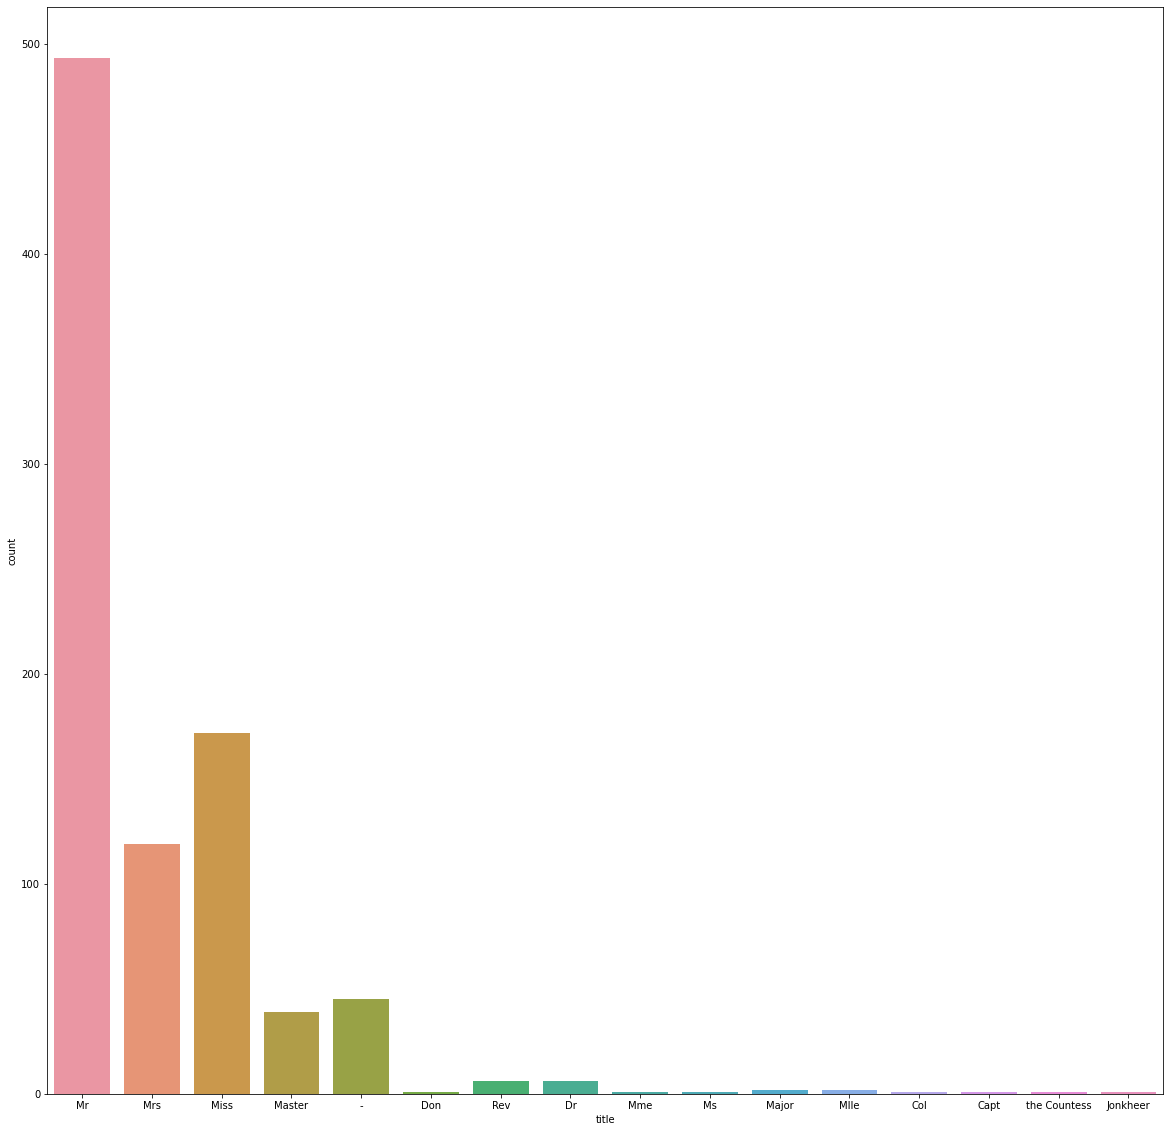

In [15]:
# plot titles barplot
plt.figure(figsize=(20,20))
display(sns.countplot(Name["title"]))

In [16]:
Name["title"].value_counts().sort_values(ascending=False)

Mr              493
Miss            172
Mrs             119
-                45
Master           39
Dr                6
Rev               6
Major             2
Mlle              2
the Countess      1
Ms                1
Col               1
Don               1
Mme               1
Capt              1
Jonkheer          1
Name: title, dtype: int64

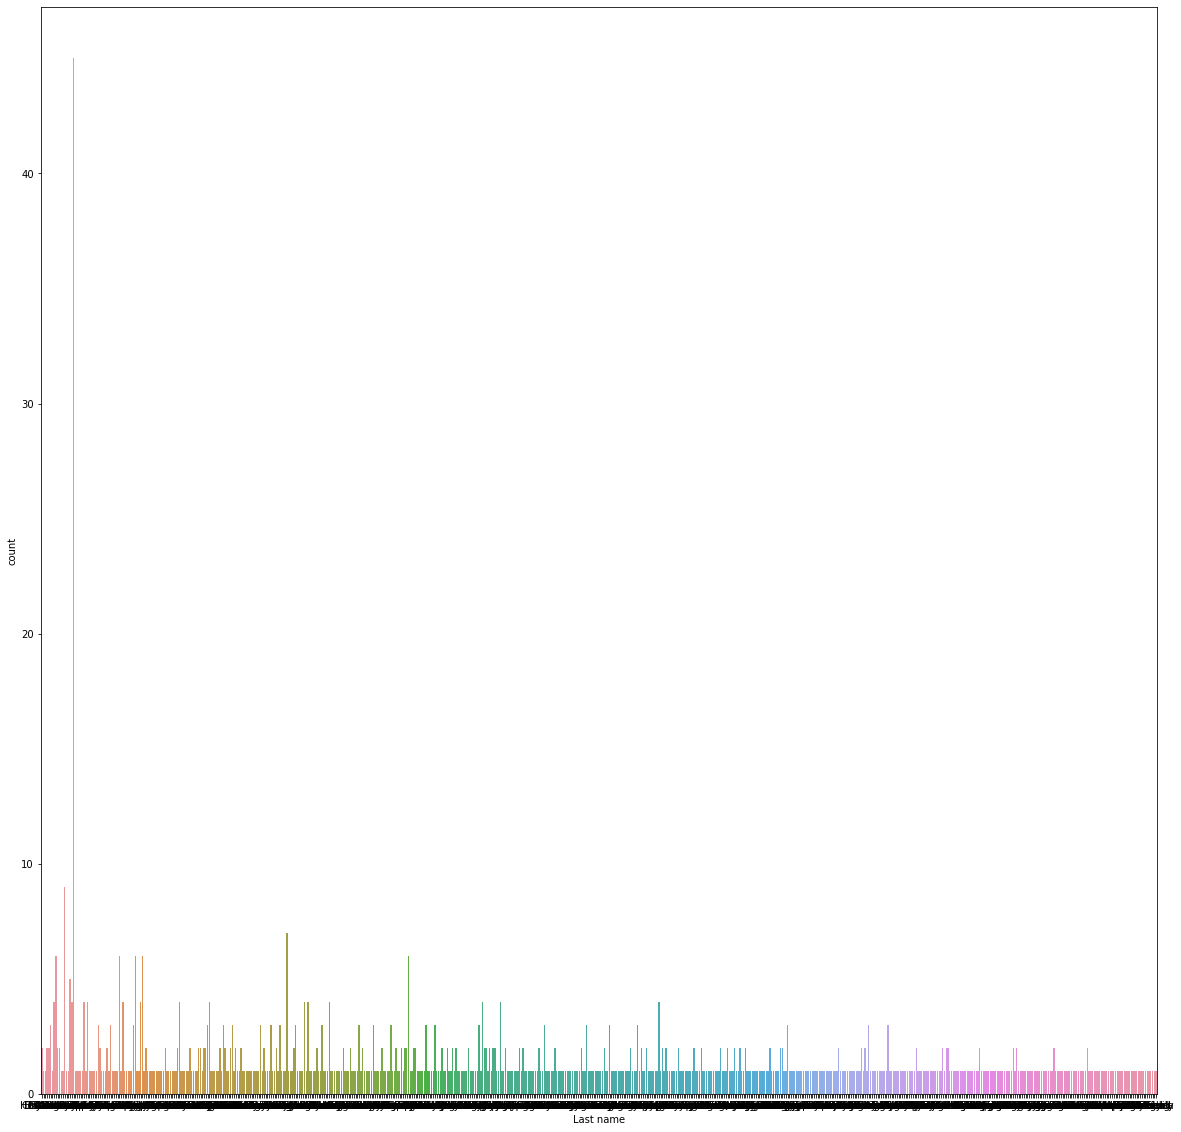

In [17]:
# plot last name barplot
plt.figure(figsize=(20,20))
display(sns.countplot(Name["Last name"]))

In [18]:
Name["Last name"].value_counts().sort_values(ascending=False)

-            45
Andersson     9
Sage          7
Johnson       6
Carter        6
             ..
Parkes        1
Dahlberg      1
Milling       1
Karlsson      1
Swift         1
Name: Last name, Length: 633, dtype: int64

> Name reflects families and titles of travelers

## Sex

In [19]:
# Slice the Sex column
Sex = train_set[["Sex"]]
# count null values
print("null values in " + str(Sex.isnull().sum()))
Sex.head()

null values in Sex    0
dtype: int64


,Sex
PassengerId,
1,male
2,female
3,female
4,female
5,male


male      577
female    314
Name: Sex, dtype: int64

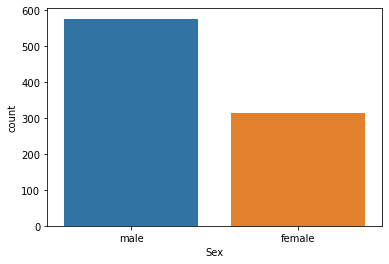

In [20]:
# countplot
sns.countplot(Sex["Sex"])
# Count Sex
Sex["Sex"].value_counts()

> Titanic contained more males than females

## Age

In [21]:
# Slice the Age column
Age = train_set[["Age"]]
# count null values
print("null values in " + str(Age.isnull().sum()))
Age.head()

null values in Age    177
dtype: int64


,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0


> Age contains 177 missing values

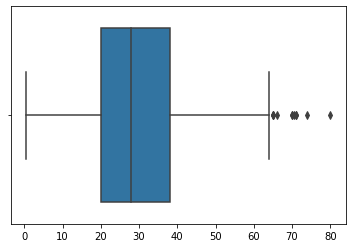

In [22]:
sns.boxplot(Age)

> Age contains many outliers

## SibSp

>sibsp: The dataset defines family relations in this way...

In [23]:
# Slice the SibSp column
SibSp = train_set[["SibSp"]]
# count null values
print("null values in " + str(SibSp.isnull().sum()))
SibSp.head()

null values in SibSp    0
dtype: int64


,SibSp
PassengerId,
1,1
2,1
3,0
4,1
5,0


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

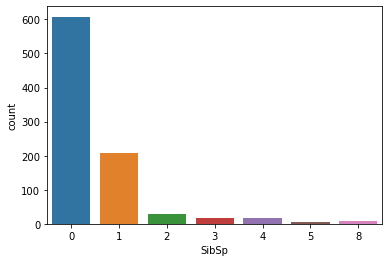

In [24]:
# countplot
sns.countplot(SibSp["SibSp"])
# Count SibSp
SibSp["SibSp"].value_counts()

## Parch

>parch: The dataset defines family relations in this way...

In [25]:
# Slice the Parch column
Parch = train_set[["Parch"]]
# count null values
print("null values in " + str(Parch.isnull().sum()))
Parch.head()

null values in Parch    0
dtype: int64


,Parch
PassengerId,
1,0
2,0
3,0
4,0
5,0


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

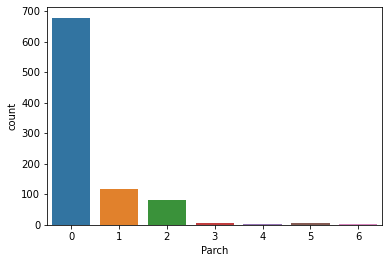

In [26]:
# countplot
sns.countplot(Parch["Parch"])
# Count Parch
Parch["Parch"].value_counts()

## Ticket

In [27]:
# Slice the Parch column
Ticket = train_set[["Ticket"]]
# count null values
print("null values in " + str(Ticket.isnull().sum()))
Ticket.head()

null values in Ticket    0
dtype: int64


,Ticket
PassengerId,
1,A/5 21171
2,PC 17599
3,STON/O2. 3101282
4,113803
5,373450


1601        7
347082      7
CA. 2343    7
347088      6
3101295     6
           ..
367228      1
29011       1
349256      1
111240      1
347466      1
Name: Ticket, Length: 681, dtype: int64

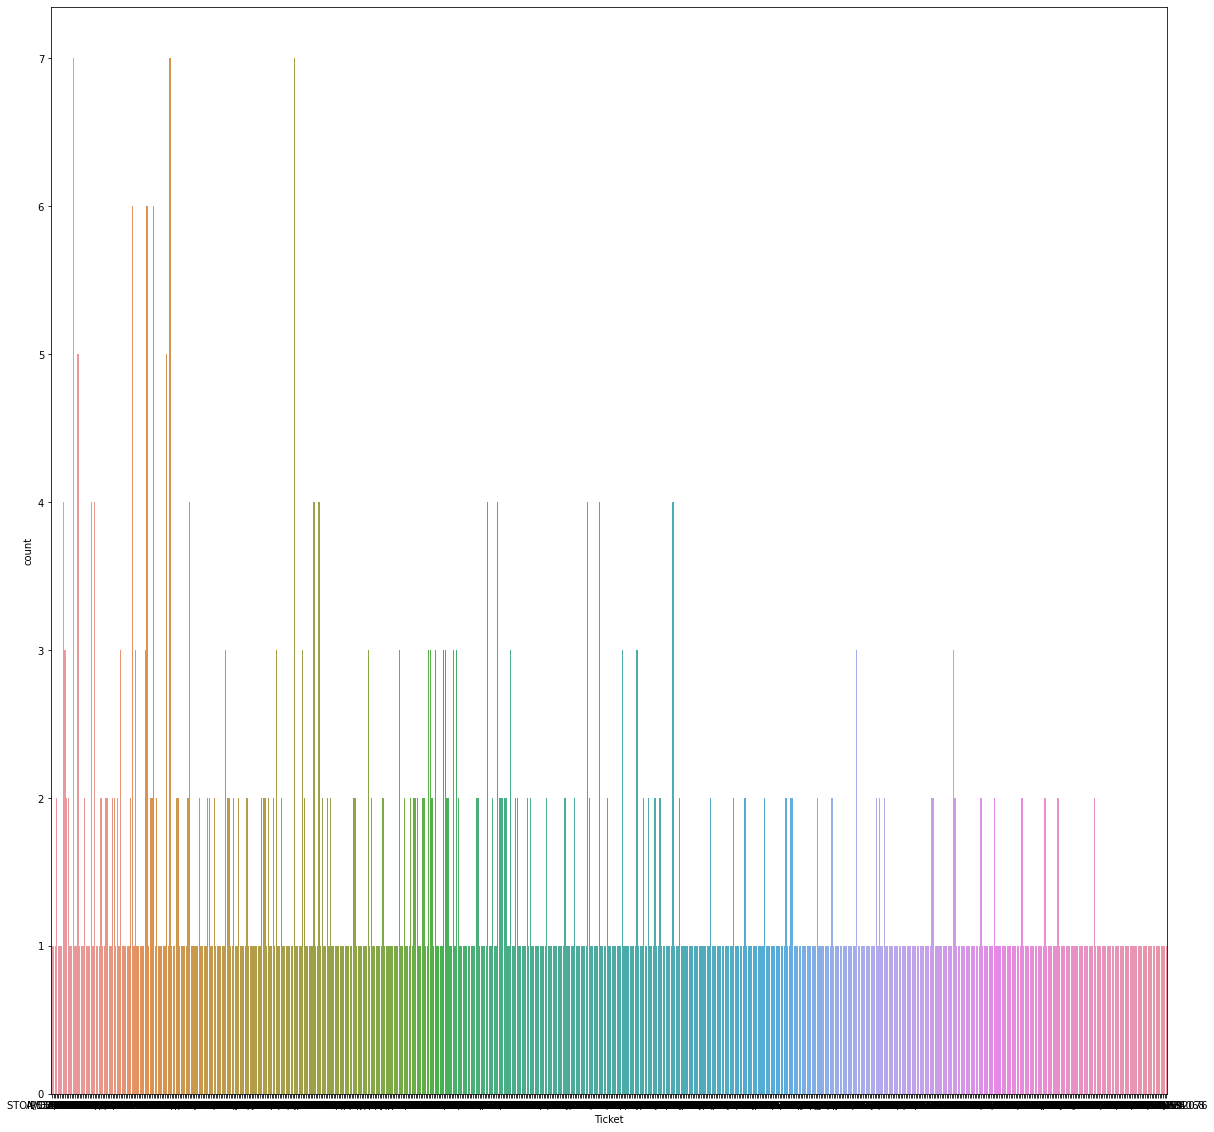

In [28]:
# countplot
plt.figure(figsize=(20,20))
display(sns.countplot(Ticket["Ticket"]))
# Count Ticket
Ticket["Ticket"].value_counts()

## Fare

In [29]:
# Slice the Parch column
Fare = train_set[["Fare"]]
# count null values
print("null values in " + str(Fare.isnull().sum()))
Fare.head()

null values in Fare    0
dtype: int64


,Fare
PassengerId,
1,7.2500
2,71.2833
3,7.9250
4,53.1000
5,8.0500


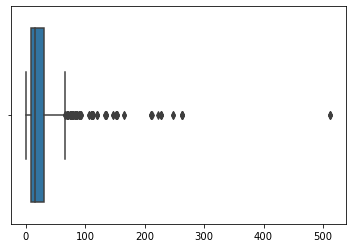

In [30]:
sns.boxplot(Fare)

> Age contains many outliers

## Cabin

In [31]:
def cabin(x):
    pattern = "([a-zA-Z]*)[0-9]*"
    results = re.match(pattern,str(x))
    if results is not None:
        return results[1]
    else:
        return "-"

# extract Cabin
train_set["Cabin"] = train_set["Cabin"].apply(cabin)
test_set["Cabin"] = test_set["Cabin"].apply(cabin)

In [32]:
# Slice the Cabin column
Cabin = train_set[["Cabin"]]
# count null values
print("null values in " + str(Cabin.isnull().sum()))
Cabin.head()

null values in Cabin    0
dtype: int64


,Cabin
PassengerId,
1,nan
2,C
3,nan
4,C
5,nan


nan    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

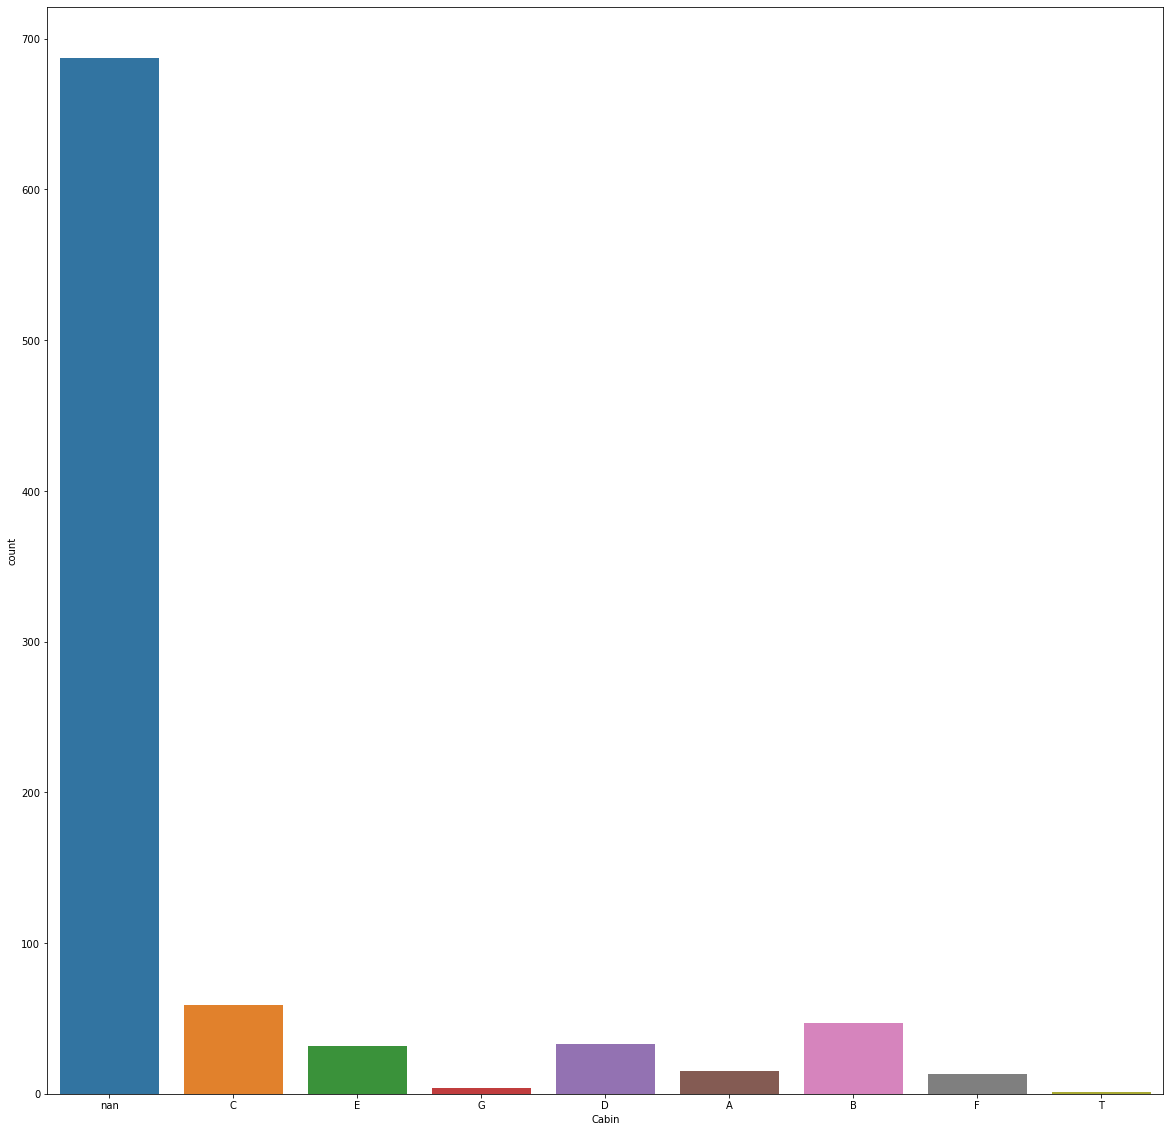

In [33]:
# countplot
plt.figure(figsize=(20,20))
display(sns.countplot(Cabin["Cabin"]))
# Count Cabin
Cabin["Cabin"].value_counts()

## Embarked

> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<img src="https://i.pinimg.com/originals/09/26/9a/09269a9f7d50a3f019182a11f7aa7981.jpg" ></img>

In [34]:
# Slice the Embarked column
Embarked = train_set[["Embarked"]]
# count null values
print("null values in " + str(Embarked.isnull().sum()))
Embarked.head()

null values in Embarked    2
dtype: int64


,Embarked
PassengerId,
1,S
2,C
3,S
4,S
5,S


S    644
C    168
Q     77
Name: Embarked, dtype: int64

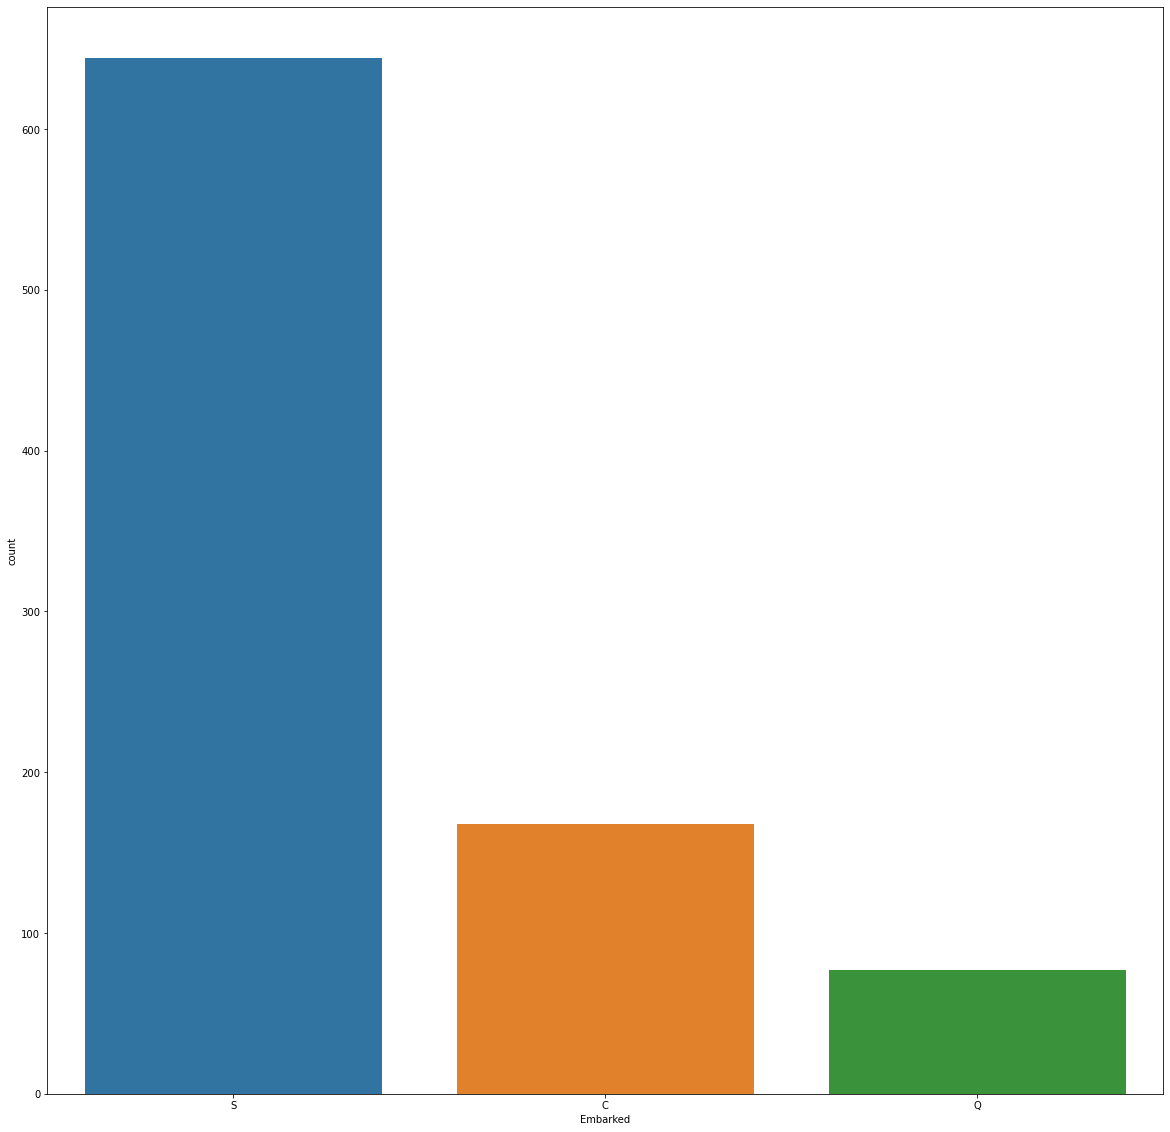

In [35]:
# countplot
plt.figure(figsize=(20,20))
display(sns.countplot(Embarked["Embarked"]))
# Count Embarked
Embarked["Embarked"].value_counts()

> The majority of persons embarked from Southampton

# Prepare Data for ML

In [36]:
y = train_set[["Survived"]]
train_set = train_set.drop("Survived",axis=1)
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last name,title
PassengerId,,,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,nan,S,Braund,Mr
2,1,female,38.0,1,0,PC 17599,71.2833,C,C,Cumings,Mrs
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,Heikkinen,Miss
4,1,female,35.0,1,0,113803,53.1000,C,S,Futrelle,Mrs
5,3,male,35.0,0,0,373450,8.0500,nan,S,Allen,Mr


In [37]:
# change y to float
y['Survived'] = y['Survived'].astype(float)

In [38]:
# Split the data set into categorical and numerical sub data sets
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_set_num = train_set.select_dtypes(include=numerics)
test_set_num = test_set.select_dtypes(include=numerics)
l=[]
for col in train_set.columns:
    if col not in train_set_num.columns:
        l.append(col)
train_set_cat = train_set[l]
test_set_cat = test_set[l]

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
# Numerical Pipeline
num_pipeline = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
# Categorical Pipeline
cat_pipeline = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [40]:
# ColumnTransformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', num_pipeline, train_set_num.columns)
   ,('categorical', cat_pipeline, train_set_cat.columns)
])

In [41]:
# fitting the pipeline
train_set_prepared = preprocessor.fit_transform(train_set)
test_set_prepared = preprocessor.fit_transform(test_set)
train_set_prepared = pd.DataFrame(train_set_prepared,columns=train_set.columns)
test_set_prepared = pd.DataFrame(test_set_prepared,columns=test_set.columns)

## Machine learning models

### Stochastic Gradient Descent

In [42]:
# Train the SGD model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set_prepared,y["Survived"])

SGDClassifier(random_state=42)

In [43]:
# Performance measurses
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = sgd_clf.predict(test_set_prepared)
print("Precision : "+str(precision_score(y_test, y_pred)))
print("recall : "+str(recall_score(y_test, y_pred)))
print("F1 : "+str(f1_score(y_test, y_pred)))
Results = [[precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)]]

Precision : 0.37073170731707317
recall : 1.0
F1 : 0.5409252669039146


<img src="https://www.researchgate.net/profile/Sebastian-Bittrich/publication/330174519/figure/fig1/AS:711883078258689@1546737560677/Confusion-matrix-Exemplified-CM-with-the-formulas-of-precision-PR-recall-RE.png" ></img>

### Random Forest classifier

In [44]:
# Train the Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_set_prepared,y["Survived"])

RandomForestClassifier()

In [45]:
# Performance measurses
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = clf.predict(test_set_prepared)
print("Precision : "+str(precision_score(y_test, y_pred)))
print("recall : "+str(recall_score(y_test, y_pred)))
print("F1 : "+str(f1_score(y_test, y_pred)))
Results.append([precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])

Precision : 0.7828571428571428
recall : 0.9013157894736842
F1 : 0.8379204892966361


### Support Vector Machine

In [46]:
# Train the Support Vector Machine model
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(train_set_prepared,y["Survived"])

SVC()

In [47]:
# Performance measurses
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = svm_clf.predict(test_set_prepared)
print("Precision : "+str(precision_score(y_test, y_pred)))
print("recall : "+str(recall_score(y_test, y_pred)))
print("F1 : "+str(f1_score(y_test, y_pred)))
Results.append([precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])

Precision : 0.3291139240506329
recall : 0.34210526315789475
F1 : 0.33548387096774196


### Logistic Regression

In [48]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegressionCV
log_clf = LogisticRegressionCV(solver='liblinear')
log_clf.fit(train_set_prepared,y["Survived"])

LogisticRegressionCV(solver='liblinear')

In [49]:
# Performance measurses
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = log_clf.predict(test_set_prepared)
print("Precision : "+str(precision_score(y_test, y_pred)))
print("recall : "+str(recall_score(y_test, y_pred)))
print("F1 : "+str(f1_score(y_test, y_pred)))
Results.append([precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])

Precision : 0.8819875776397516
recall : 0.9342105263157895
F1 : 0.9073482428115016


# Summary

In [50]:
Results = pd.DataFrame(np.array(Results),columns=["Precision","recall","F1"],index=["Stochastic Gradient Descent","Random Forest classifier","Support Vector Machine","Logistic Regression"])
Results.head()

,Precision,recall,F1
Stochastic Gradient Descent,0.370732,1.000000,0.540925
Random Forest classifier,0.782857,0.901316,0.837920
Support Vector Machine,0.329114,0.342105,0.335484
Logistic Regression,0.881988,0.934211,0.907348


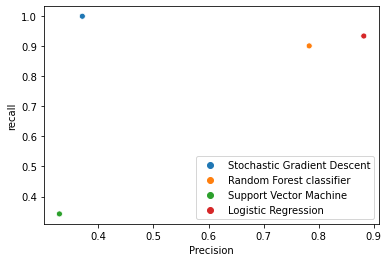

In [51]:
sns.scatterplot(x="Precision",y="recall",data=Results,hue=Results.index)